## Orbit Maintenance 
### Larson & Werz - Sec. 6.5

In [94]:
import constants as cts
import numpy as np

#### Auxiliary Functions

In [95]:
def compute_sma(P):
    """
    Compute semimajor-axis from Period
    """
    P_seg = P*60
    return np.cbrt(P_seg*P_seg*cts.mu_e/(4*np.pi*np.pi))

In [96]:
def J2_RAAN_drift(a,e,i):
    """
    J2_RAAN_drift raw estimation of the drift of the Node
    when considering the J2 perturbation
    [Ref]  Larson & Wertz - pag 143
    :param a: semimajor-axis [km]
    :param e: eccentriticty
    :param i: inclination [deg]
    -----------------------------
    return OMEGA_drift [deg/day]
    """
    return -2.06474e14*a**(-7/2)*np.cos(i*cts.deg2rad)*(1-e)**(-2)

#### Scenario

In [97]:
# Definition from book

k_rev = 16 # revolutions
P=cts.min_sidereal_day/k_rev # [min]
sma = compute_sma(P)

In [98]:
# 1. Define Satellite Physical Properties (Manual or from Database) (o input de usuario)
sat_properties = {
    'cd': 2.2,      # Standard drag coefficient
    'area': 12.5,   # m^2 (Effective cross-section)
    'mass': 450.0,   # kg
    'h': 450.0      # km
}


In [99]:
from analytics import *
atmparams = {
    'cd': sat_properties['cd'],
    'area': sat_properties['area'],
    'mass': sat_properties['mass'],
    'h': sat_properties['h'],
    'a': sma
}


In [100]:
atmparams

{'cd': 2.2, 'area': 12.5, 'mass': 450.0, 'h': 450.0, 'a': 6640.440581263014}

### Decay and Lifetime computation

In [101]:
da_rev =drag_decay_per_rev(atmparams)
life_time = estimate_lifetime(atmparams)

In [102]:
print(f'Decay in every revolution: {np.round(da_rev,4)} Km' )
print(f'Life Time: {np.round(life_time,4)} days' )

Decay in every revolution: -0.0268 Km
Life Time: 163.5092 days


### Repeating Ground Track

In [103]:
hp=120.0 # [km]
i=45  # [deg]

In [104]:
r_a= 2*compute_sma(P)-(hp+cts.Re)
b = np.sqrt(r_a*(hp+cts.Re))
e = np.sqrt(1-(b*b/(sma*sma)))

In [105]:
# RAAN drift
Ome_dot = J2_RAAN_drift(sma,e,i)

In [ ]:
# Period computation iteration
P_ini = P

sma = compute_sma(P_ini)
r_a= 2*sma-(hp+cts.Re)
b = np.sqrt(r_a*(hp+cts.Re))
e = np.sqrt(1-(b*b/(sma*sma)))
Ome_dot = J2_RAAN_drift(sma,e,i) # [deg/day]
Ome_dot_min = Ome_dot/1440 # [deg/min]
# cuantos minutos le llevo a Tierra recorrer el Delta de RAAN 
Delta_period = Ome_dot_min*P_ini/cts.earth_angular_velocity
P_new = P_ini + Delta_period
P_ini = P_new 

sma1 = compute_sma(P_ini)


# New P

print (f'New Period: {np.round(P_ini,4)} and New sma: {np.round(sma1,4)}')


New Period: 88.1611 and New sma: 6561.6287


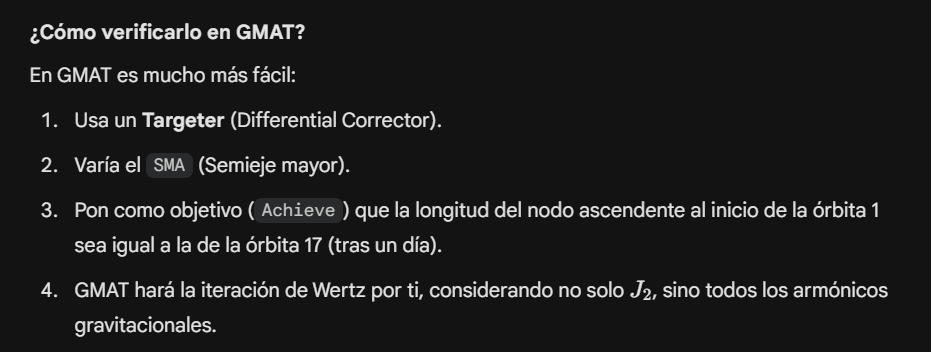